## What variables affect the COE Premium price, and which is the most correlated with Quota Premium?

## Apply Linear Regression for Quota Premium and the most correlated variable, to predict Quota Premium price

## Can we make a profit using this Linear Regression Model? Using 5 years of data from the COE Dataset, we will simulate trading COE to make a profit

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() #set the default Seaborn style for graphics

## Datasets used:

COE Price Dataset from coe.sgcharts.com

Singapore’s GDP Trend Dataset from singstat.gov.sg

# Read in the COE Bidding data set

In [2]:
#importing COE Data File

COEData = pd.read_csv('COEBid.csv')
COEData.head()

,Bidding Exercise,Announcement Date,Year,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids
0,March 2022 First Open Bidding Exercise,9/3/2022,2022,Cat A (Cars up to 1600cc and 97kW),531,68501,962,526
1,March 2022 First Open Bidding Exercise,9/3/2022,2022,Cat B (Cars above 1600cc or 97kW),551,94889,860,551
2,March 2022 First Open Bidding Exercise,9/3/2022,2022,Cat C (Goods vehicles and buses),76,48889,199,67
3,March 2022 First Open Bidding Exercise,9/3/2022,2022,Cat D (Motorcycles),405,11400,602,403
4,March 2022 First Open Bidding Exercise,9/3/2022,2022,Cat E (Open),190,98890,318,190


In [3]:
print("Data type : ", type(COEData))
print("Data dims : ", COEData.shape)
print("\n")
COEData.info()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2365, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Bidding Exercise           2365 non-null   object
 1   Announcement Date          2365 non-null   object
 2   Year                       2365 non-null   int64 
 3   Category                   2365 non-null   object
 4   Quota                      2365 non-null   int64 
 5   Quota Premium              2365 non-null   int64 
 6   Total Bids Received        2365 non-null   int64 
 7   Number of Successful Bids  2365 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 147.9+ KB


We can use .info() to see the different datatypes present in the COEData dataframe.

## Number of Unique Data in COEData

In [4]:
COEData.groupby('Category').nunique()

,Bidding Exercise,Announcement Date,Year,Quota,Quota Premium,Total Bids Received,Number of Successful Bids
Category,,,,,,,
Cat A (Cars up to 1600cc and 97kW),473,473,21,335,452,444,377
Cat B (Cars above 1600cc or 97kW),473,473,21,292,435,410,327
Cat C (Goods vehicles and buses),473,473,21,247,425,345,274
Cat D (Motorcycles),473,473,21,275,360,342,288
Cat E (Open),473,473,21,330,434,415,354


From the above, we can see that the number of unique values Bidding Exercise, Announcement Date and Year are the same for the 5 COE Categories, this is because the Bidding and Announcement date for COE occurs at the same time for all the categories. The number of unique values differ for Quota, Quota Premium, Total Bids Received and the Number of Successful Bids. This is because the availability of COE is different for the different vehicle categories.

# Read in the GDP Trend data set

We then read in the data for GDP trends into a dataframe called GDPData. We chose to use the GDP Trend dataset to do further analysis, like whether there is any correlation between the GDP  and COE Prices (are the trends correlated).

In [5]:
#insert GDP Data to merge with main data(COE Data)
GDPData = pd.read_csv('M015941.csv')
GDPData.head()

,Data Series,GDP In Chained (2015) Dollars,Goods Producing Industries,Manufacturing,Construction,Services Producing Industries,Wholesale & Retail Trade And Transportation & Storage,"Information & Communications, Finance & Insurance And Professional Services","Accommodation & Food Services, Real Estate, Administrative & Support Services And Other Services Industries"
0,2021 4Q,128440.5,34736.7,29160.9,3684.0,80995.2,25992.4,32251.7,22788.7
1,2021 3Q,123844.4,33871.4,28361.9,3625.1,78089.9,24489.4,31473.2,22257.2
2,2021 2Q,122091.6,33168.3,27835.6,3456.2,76898.5,24324.3,30748.2,21924.2
3,2021 1Q,121785.1,32744.9,27218.2,3699.5,76569.2,24094.3,30006,22616
4,2020 4Q,120999.9,30569.5,25237.8,3578.8,77553.3,24947.6,30243.6,22422.4


In [6]:
print("Data type : ", type(GDPData))
print("Data dims : ", GDPData.shape)
print("\n")
GDPData.info()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (188, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 9 columns):
 #   Column                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                           --------------  -----  
 0   Data Series                                                                                                      187 non-null    object 
 1   GDP In Chained (2015) Dollars                                                                                    188 non-null    float64
 2     Goods Producing Industries                                                                                     188 non-null    float64
 3       Manufacturing                                                                                         

# Dataset Cleaning

We noticed that the COEData actually goes from December 2002 to March 2022. To simplify and make our analysis consistent, we will analyse from December 2002 to December 2021. We do this by removing data that goes after December 2021 (January 2022 to March 2022) by starting the COEData dataframe from 25th index.

We then need to reset the index of COEData, to make it start from 0 instead of from 25.

In [7]:
#Remove Data from COE Data where Date > 2021 Dec 31
COEData=COEData[25:]

#Reset the index such that it goes from 0,1,2...
COEData.reset_index(drop=True, inplace=True)
COEData

,Bidding Exercise,Announcement Date,Year,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids
0,December 2021 Second Open Bidding Exercise,22/12/2021,2021,Cat A (Cars up to 1600cc and 97kW),534,58801,740,534
1,December 2021 Second Open Bidding Exercise,22/12/2021,2021,Cat B (Cars above 1600cc or 97kW),595,80989,829,590
2,December 2021 Second Open Bidding Exercise,22/12/2021,2021,Cat C (Goods vehicles and buses),90,44000,150,89
3,December 2021 Second Open Bidding Exercise,22/12/2021,2021,Cat D (Motorcycles),426,9601,562,422
4,December 2021 Second Open Bidding Exercise,22/12/2021,2021,Cat E (Open),177,83889,241,177
...,...,...,...,...,...,...,...,...
2335,December 2002 Second Open Bidding Exercise,15/12/2002,2002,Cat A (Cars up to 1600cc and 97kW),1338,26993,1546,1337
2336,December 2002 Second Open Bidding Exercise,15/12/2002,2002,Cat B (Cars above 1600cc or 97kW),728,23890,977,728
2337,December 2002 Second Open Bidding Exercise,15/12/2002,2002,Cat C (Goods vehicles and buses),579,10001,682,544
2338,December 2002 Second Open Bidding Exercise,15/12/2002,2002,Cat D (Motorcycles),991,1,734,734


We filtered out data that is not needed for our analysis (such as the different components for GDP), and left behind the Data Series and GDP In Chained (2015) Dollars collumns. (The time and GDP data).

In [8]:
# Filtering out unnessasary data, leaving just Date and GDP
DataSeries = pd.DataFrame(GDPData['Data Series'])
GDPChained = pd.DataFrame(GDPData['GDP In Chained (2015) Dollars'])

#Concatenate only both DataSeries and GDPChained columns into a new dataframe called TimeAndGDP
TimeAndGDP = pd.concat([DataSeries, GDPChained],axis=1)
TimeAndGDP

,Data Series,GDP In Chained (2015) Dollars
0,2021 4Q,128440.5
1,2021 3Q,123844.4
2,2021 2Q,122091.6
3,2021 1Q,121785.1
4,2020 4Q,120999.9
...,...,...
183,1976 1Q,7972.0
184,1975 4Q,8134.6
185,1975 3Q,7960.5
186,1975 2Q,7564.2


In [9]:
# Remove all Null value from TimeAndGDP Data
TimeAndGDP = pd.DataFrame.dropna(TimeAndGDP)
TimeAndGDP

,Data Series,GDP In Chained (2015) Dollars
0,2021 4Q,128440.5
1,2021 3Q,123844.4
2,2021 2Q,122091.6
3,2021 1Q,121785.1
4,2020 4Q,120999.9
...,...,...
182,1976 2Q,8124.5
183,1976 1Q,7972.0
184,1975 4Q,8134.6
185,1975 3Q,7960.5


# One new thing we learnt

The format for time is different for both datasets, COEData uses Day/Month/Year while TimeAndGDP uses Year and Quarter. As such, our team decided to use Epoch Timing to process the time data for both datasets in a universal way.

For the 'Data Series' column in TimeAndGDP, we converted each quarter to the 1st day of that quarter. (For example, 2021 4Q represents 1st October 2021 and 2020 1Q represents 1st January 2020)

In [10]:
#Converting 2021 Q4 into Epoch Timing for datetime processing

import datetime

for index,i in enumerate(TimeAndGDP['Data Series']):
    string_data=str(i)
    year = string_data[0:4]
    year=int(year)
    Quarter = string_data[5:7]
    #print(Quarter)
    #str(i)
    if (Quarter == "4Q"):  #let Q4 be 1st oct 
        ts= datetime.datetime(year,10,1).timestamp()
        TimeAndGDP['Data Series'][index] = ts
    elif(Quarter == "3Q"): #let Q4 be 1st july 
        ts= datetime.datetime(year,7,1).timestamp()
        TimeAndGDP['Data Series'][index] = ts
    elif(Quarter == "2Q"): #let Q4 be 1st april 
        ts= datetime.datetime(year,4,1).timestamp()
        TimeAndGDP['Data Series'][index] = ts
    elif(Quarter == "1Q"): #let Q4 be 1st jan 
        ts= datetime.datetime(year,1,1).timestamp()
        TimeAndGDP['Data Series'][index] = ts


C:\Users\admin\AppData\Local\Temp/ipykernel_12648/3653743772.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TimeAndGDP['Data Series'][index] = ts
C:\Users\admin\AppData\Local\Temp/ipykernel_12648/3653743772.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TimeAndGDP['Data Series'][index] = ts
C:\Users\admin\AppData\Local\Temp/ipykernel_12648/3653743772.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TimeAndGDP['Data Seri

As the COE dataset only starts from January 2002, we removed data from TimeAndGDP that corresponds to dates earlier than January 2002.

In [11]:
# Remove data from GDP that are lesser than year 2002 because the COE data starts from Jan 2002
ts = datetime.datetime(2002,1,1).timestamp()
TimeAndGDP = TimeAndGDP[TimeAndGDP['Data Series'] > ts]

TimeAndGDP

,Data Series,GDP In Chained (2015) Dollars
0,1633017600.0,128440.5
1,1625068800.0,123844.4
2,1617206400.0,122091.6
3,1609430400.0,121785.1
4,1601481600.0,120999.9
...,...,...
74,1049126400.0,49717.3
75,1041350400.0,49958.8
76,1033401600.0,50497.4
77,1025452800.0,50336.3


We repeat each row of TimeAndGDP 6 times, 3 times because a Quarter represents 3 months and 2 more times because each Quarter has 2 COE biddings

In [12]:
# Repeat each row 6 times, 3 because a Quarter represents 3 months x 2 times because each Quarter has 2 COE biddings
TimeAndGDPx6=TimeAndGDP.loc[TimeAndGDP.index.repeat(6)].reset_index(drop=True)
TimeAndGDPx6

,Data Series,GDP In Chained (2015) Dollars
0,1633017600.0,128440.5
1,1633017600.0,128440.5
2,1633017600.0,128440.5
3,1633017600.0,128440.5
4,1633017600.0,128440.5
...,...,...
469,1017590400.0,49845.5
470,1017590400.0,49845.5
471,1017590400.0,49845.5
472,1017590400.0,49845.5


We converted COE Announcement Date in COEData into Epoch Timing format and appended a new column for that Epoch Date.

In [13]:
#Converting COEData Announcement Date into Epoch Timing
from datetime import datetime
COEData['Epoch Date'] = COEData['Announcement Date'] #Create a new column

for idx,i in enumerate(COEData['Announcement Date']):
    x = datetime.strptime(COEData['Announcement Date'][idx],"%d/%m/%Y")
    epoch_time = (x - datetime(1970, 1, 1)).total_seconds()
    COEData['Epoch Date'][idx] = epoch_time 

C:\Users\admin\AppData\Local\Temp/ipykernel_12648/2921268227.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COEData['Epoch Date'][idx] = epoch_time


In [14]:
COEData

,Bidding Exercise,Announcement Date,Year,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids,Epoch Date
0,December 2021 Second Open Bidding Exercise,22/12/2021,2021,Cat A (Cars up to 1600cc and 97kW),534,58801,740,534,1640131200.0
1,December 2021 Second Open Bidding Exercise,22/12/2021,2021,Cat B (Cars above 1600cc or 97kW),595,80989,829,590,1640131200.0
2,December 2021 Second Open Bidding Exercise,22/12/2021,2021,Cat C (Goods vehicles and buses),90,44000,150,89,1640131200.0
3,December 2021 Second Open Bidding Exercise,22/12/2021,2021,Cat D (Motorcycles),426,9601,562,422,1640131200.0
4,December 2021 Second Open Bidding Exercise,22/12/2021,2021,Cat E (Open),177,83889,241,177,1640131200.0
...,...,...,...,...,...,...,...,...,...
2335,December 2002 Second Open Bidding Exercise,15/12/2002,2002,Cat A (Cars up to 1600cc and 97kW),1338,26993,1546,1337,1039910400.0
2336,December 2002 Second Open Bidding Exercise,15/12/2002,2002,Cat B (Cars above 1600cc or 97kW),728,23890,977,728,1039910400.0
2337,December 2002 Second Open Bidding Exercise,15/12/2002,2002,Cat C (Goods vehicles and buses),579,10001,682,544,1039910400.0
2338,December 2002 Second Open Bidding Exercise,15/12/2002,2002,Cat D (Motorcycles),991,1,734,734,1039910400.0


# We can split the COEData Dataframe into the seperate COE Categories.
CatA (Category A) will be the main focus of our analysis

In [15]:
#Spilt data into differenet category for easier processing
CatA = COEData[COEData['Category'] == "Cat A (Cars up to 1600cc and 97kW)"]
CatB = COEData[COEData['Category'] == "Cat B (Cars above 1600cc or 97kW)"]
CatC = COEData[COEData['Category'] == "Cat C (Goods vehicles and buses)"]
CatD = COEData[COEData['Category'] == "Cat D (Motorcycles)"]
CatE = COEData[COEData['Category'] == "Cat E (Open)"]

In [16]:
CatA

,Bidding Exercise,Announcement Date,Year,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids,Epoch Date
0,December 2021 Second Open Bidding Exercise,22/12/2021,2021,Cat A (Cars up to 1600cc and 97kW),534,58801,740,534,1640131200.0
5,December 2021 First Open Bidding Exercise,8/12/2021,2021,Cat A (Cars up to 1600cc and 97kW),536,57010,771,525,1638921600.0
10,November 2021 Second Open Bidding Exercise,17/11/2021,2021,Cat A (Cars up to 1600cc and 97kW),537,55001,706,535,1637107200.0
15,November 2021 First Open Bidding Exercise,3/11/2021,2021,Cat A (Cars up to 1600cc and 97kW),536,53709,834,531,1635897600.0
20,October 2021 Second Open Bidding Exercise,20/10/2021,2021,Cat A (Cars up to 1600cc and 97kW),811,52709,1304,806,1634688000.0
...,...,...,...,...,...,...,...,...,...
2315,October 2002 Second Open Bidding Exercise,15/10/2002,2002,Cat A (Cars up to 1600cc and 97kW),1112,30758,1624,1110,1034640000.0
2320,November 2002 First Open Bidding Exercise,1/11/2002,2002,Cat A (Cars up to 1600cc and 97kW),1346,29113,1724,1346,1036108800.0
2325,November 2002 Second Open Bidding Exercise,15/11/2002,2002,Cat A (Cars up to 1600cc and 97kW),1334,29008,1942,1328,1037318400.0
2330,December 2002 First Open Bidding Exercise,1/12/2002,2002,Cat A (Cars up to 1600cc and 97kW),1332,28501,1851,1322,1038700800.0


After splitting COEData into the different categories, the index still remains the same for each category. (From above, the indexing for CatA is in multiples of 5)

We reset the index such that it goes from 0,1,2...

In [17]:
# Reset the index such that it starts from 0

CatA.reset_index(drop=True, inplace=True)
CatA

,Bidding Exercise,Announcement Date,Year,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids,Epoch Date
0,December 2021 Second Open Bidding Exercise,22/12/2021,2021,Cat A (Cars up to 1600cc and 97kW),534,58801,740,534,1640131200.0
1,December 2021 First Open Bidding Exercise,8/12/2021,2021,Cat A (Cars up to 1600cc and 97kW),536,57010,771,525,1638921600.0
2,November 2021 Second Open Bidding Exercise,17/11/2021,2021,Cat A (Cars up to 1600cc and 97kW),537,55001,706,535,1637107200.0
3,November 2021 First Open Bidding Exercise,3/11/2021,2021,Cat A (Cars up to 1600cc and 97kW),536,53709,834,531,1635897600.0
4,October 2021 Second Open Bidding Exercise,20/10/2021,2021,Cat A (Cars up to 1600cc and 97kW),811,52709,1304,806,1634688000.0
...,...,...,...,...,...,...,...,...,...
463,October 2002 Second Open Bidding Exercise,15/10/2002,2002,Cat A (Cars up to 1600cc and 97kW),1112,30758,1624,1110,1034640000.0
464,November 2002 First Open Bidding Exercise,1/11/2002,2002,Cat A (Cars up to 1600cc and 97kW),1346,29113,1724,1346,1036108800.0
465,November 2002 Second Open Bidding Exercise,15/11/2002,2002,Cat A (Cars up to 1600cc and 97kW),1334,29008,1942,1328,1037318400.0
466,December 2002 First Open Bidding Exercise,1/12/2002,2002,Cat A (Cars up to 1600cc and 97kW),1332,28501,1851,1322,1038700800.0


## Line plot of Quota Premium vs Announcement Date

We plot CatA's Quota Premium from December 2002 to December 2021 Announcment Dates to see the trend of Quota Premium.

C:\Users\admin\AppData\Local\Temp/ipykernel_12648/733419138.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CatA['Date'] = pd.to_datetime(CatA['Announcement Date'], format = '%d/%m/%Y')


<AxesSubplot:xlabel='Announcement Date', ylabel='Quota Premium'>

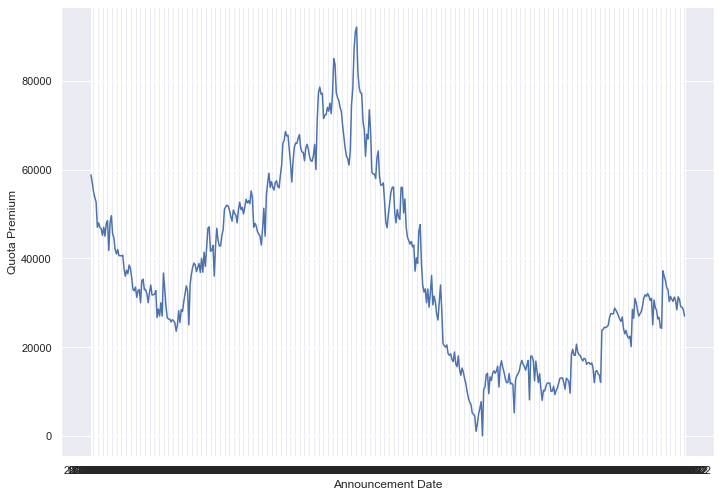

In [18]:
# View trend of Quota Premium for Cat A over time

sb.set(rc={'figure.figsize':(11.7,8.27)})

#Convert object date to datetime in dataframe
CatA['Date'] = pd.to_datetime(CatA['Announcement Date'], format = '%d/%m/%Y')
sb.lineplot(x='Announcement Date',y = 'Quota Premium', data = CatA)

## Concatenate GDP Trend and COE Trend
Concatenate the Generated TimeAndGDPx6 and CatA dataframes to have a single dataframe that shows the GDP Trend and the COE prices for Category A during that time

In [19]:
TimeAndGDPAndCatA = pd.concat([TimeAndGDPx6, CatA], axis=1)
TimeAndGDPAndCatA = pd.DataFrame.dropna(TimeAndGDPAndCatA)
TimeAndGDPAndCatA

,Data Series,GDP In Chained (2015) Dollars,Bidding Exercise,Announcement Date,Year,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids,Epoch Date,Date
0,1633017600.0,128440.5,December 2021 Second Open Bidding Exercise,22/12/2021,2021.0,Cat A (Cars up to 1600cc and 97kW),534.0,58801.0,740.0,534.0,1640131200.0,2021-12-22
1,1633017600.0,128440.5,December 2021 First Open Bidding Exercise,8/12/2021,2021.0,Cat A (Cars up to 1600cc and 97kW),536.0,57010.0,771.0,525.0,1638921600.0,2021-12-08
2,1633017600.0,128440.5,November 2021 Second Open Bidding Exercise,17/11/2021,2021.0,Cat A (Cars up to 1600cc and 97kW),537.0,55001.0,706.0,535.0,1637107200.0,2021-11-17
3,1633017600.0,128440.5,November 2021 First Open Bidding Exercise,3/11/2021,2021.0,Cat A (Cars up to 1600cc and 97kW),536.0,53709.0,834.0,531.0,1635897600.0,2021-11-03
4,1633017600.0,128440.5,October 2021 Second Open Bidding Exercise,20/10/2021,2021.0,Cat A (Cars up to 1600cc and 97kW),811.0,52709.0,1304.0,806.0,1634688000.0,2021-10-20
...,...,...,...,...,...,...,...,...,...,...,...,...
463,1025452800.0,50336.3,October 2002 Second Open Bidding Exercise,15/10/2002,2002.0,Cat A (Cars up to 1600cc and 97kW),1112.0,30758.0,1624.0,1110.0,1034640000.0,2002-10-15
464,1025452800.0,50336.3,November 2002 First Open Bidding Exercise,1/11/2002,2002.0,Cat A (Cars up to 1600cc and 97kW),1346.0,29113.0,1724.0,1346.0,1036108800.0,2002-11-01
465,1025452800.0,50336.3,November 2002 Second Open Bidding Exercise,15/11/2002,2002.0,Cat A (Cars up to 1600cc and 97kW),1334.0,29008.0,1942.0,1328.0,1037318400.0,2002-11-15
466,1025452800.0,50336.3,December 2002 First Open Bidding Exercise,1/12/2002,2002.0,Cat A (Cars up to 1600cc and 97kW),1332.0,28501.0,1851.0,1322.0,1038700800.0,2002-12-01


## Time Series of GDP

<AxesSubplot:xlabel='Date', ylabel='GDP In Chained (2015) Dollars'>

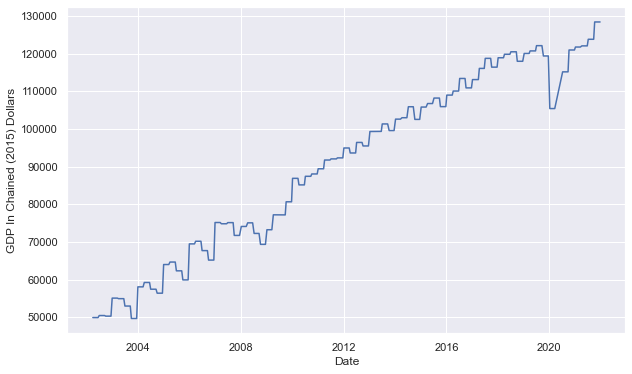

In [20]:
# Print GDP with Time
f, axes = plt.subplots(figsize=(10, 6))
sb.lineplot(data=TimeAndGDPAndCatA, x='Date' ,y = "GDP In Chained (2015) Dollars")

We can see that GDP is consistently rising over time, with a big dip occuring around 2020. This could be attributed to the start of Covid-19

## Time Series of Quota Premium

<AxesSubplot:xlabel='Date', ylabel='Quota Premium'>

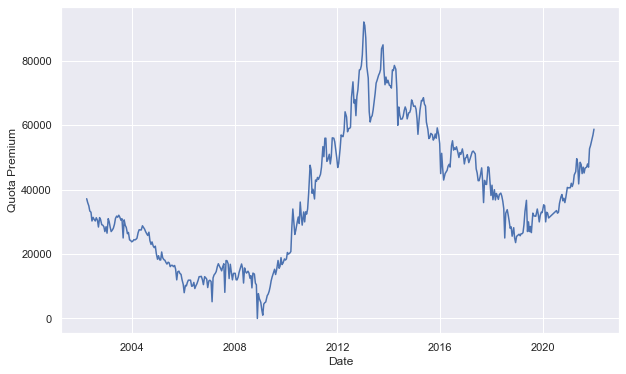

In [21]:
f, axes = plt.subplots(figsize=(10, 6))
sb.lineplot(data=TimeAndGDPAndCatA, x='Date' ,y = "Quota Premium")

# Statistical Analysis
We can compute the statistics for Cat A's Quota Premium, Quota, Cat A's number of Total Bids Received and the GDP in Chained (2015) Dollars using .describe()

In [22]:
CatAQuotaPrem = pd.DataFrame(TimeAndGDPAndCatA['Quota Premium'])
CatAQuotaPrem.describe()

,Quota Premium
count,468.000000
mean,36975.893162
std,20008.386179
min,2.000000
25%,18799.750000
50%,33004.500000
75%,51506.250000
max,92100.000000


In [23]:
CatATotalBids = pd.DataFrame(TimeAndGDPAndCatA['Total Bids Received'])
CatATotalBids.describe()

,Total Bids Received
count,468.000000
mean,1986.976496
std,977.418103
min,418.000000
25%,1126.250000
50%,2021.500000
75%,2610.250000
max,5927.000000


In [24]:
GDPDollar = pd.DataFrame(TimeAndGDP['GDP In Chained (2015) Dollars'])
GDPDollar.describe()

,GDP In Chained (2015) Dollars
count,79.000000
mean,89937.981013
std,23844.546610
min,49717.300000
25%,69870.100000
50%,92354.300000
75%,110518.600000
max,128440.500000


In [25]:
CatAQuota = pd.DataFrame(TimeAndGDPAndCatA['Quota'])
CatAQuota.describe()

,Quota
count,468.000000
mean,1424.450855
std,701.987701
min,333.000000
25%,706.000000
50%,1442.000000
75%,2025.500000
max,2858.000000


We used GDP data from the TimeAndGDP dataframe because this is the original numbers, without any extra values like from when we duplicated it 6 times in TimeAndGDPx6

# Plot Uni-variate distributions for CatAQuotaPrem, Quota, CatATotalBids and GDPDollar

<AxesSubplot:>

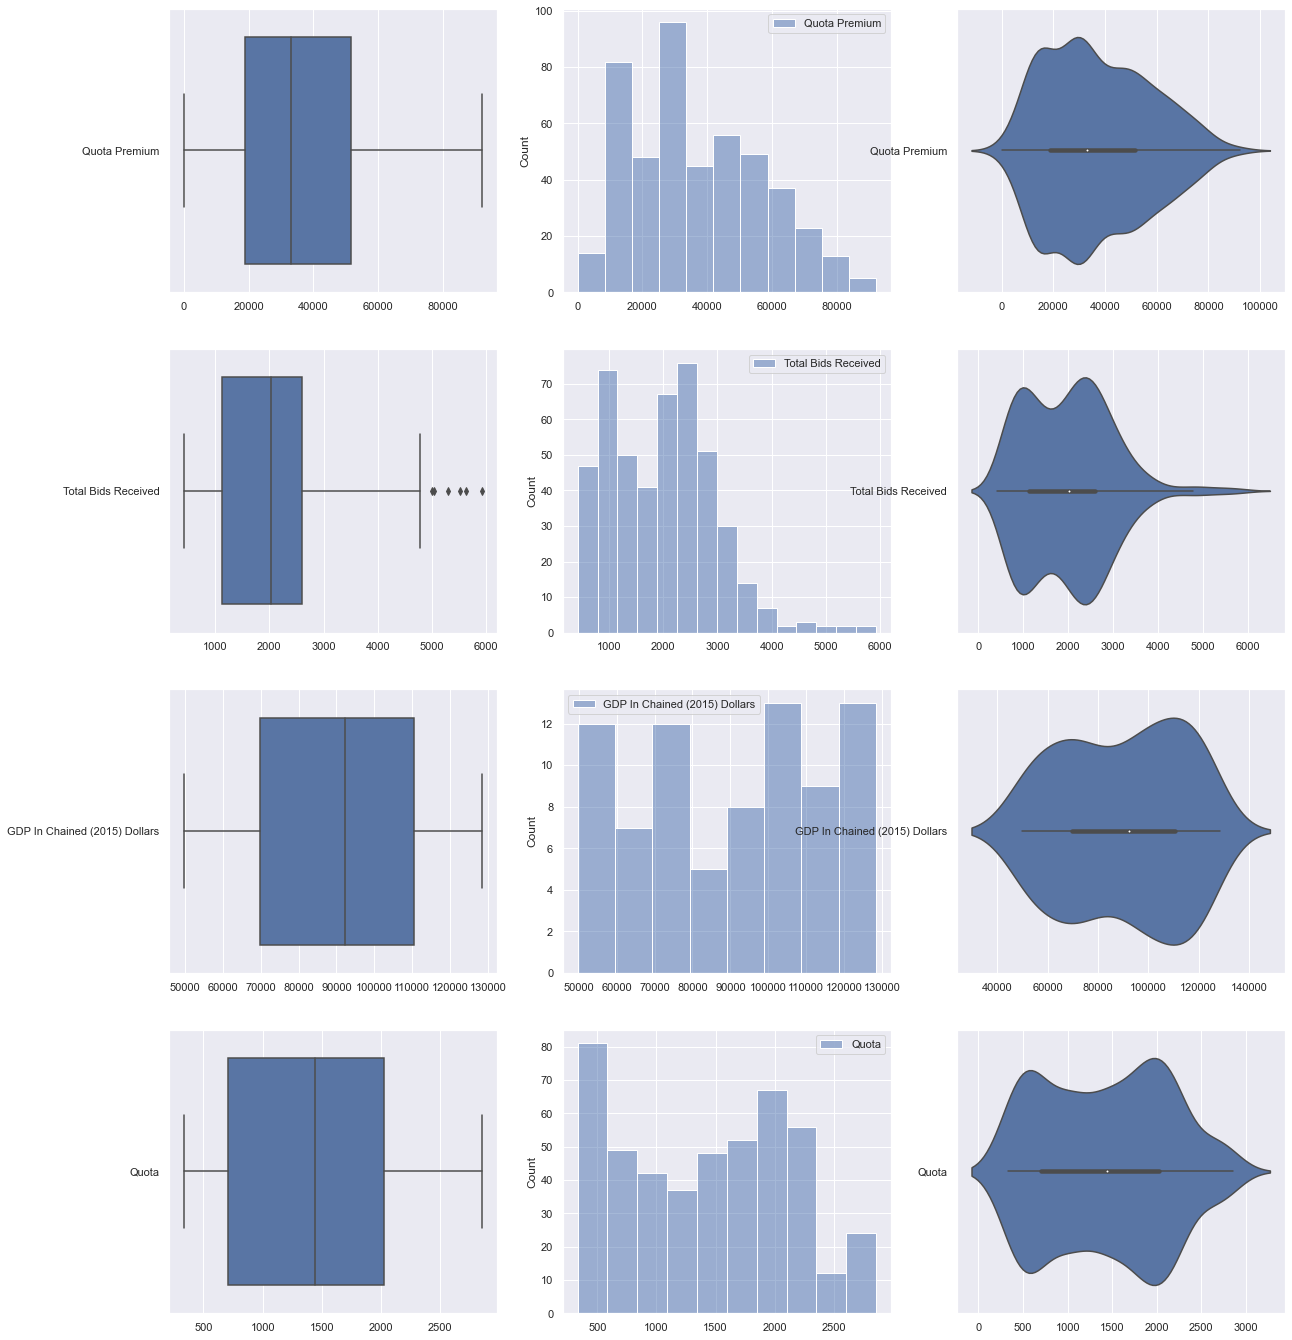

In [26]:
f, axes = plt.subplots(4, 3, figsize=(20, 24))

sb.boxplot(data = CatAQuotaPrem, orient = "h", ax = axes[0,0])
sb.histplot(data = CatAQuotaPrem, ax = axes[0,1])
sb.violinplot(data = CatAQuotaPrem, orient = "h", ax = axes[0,2])
sb.boxplot(data = CatATotalBids, orient = "h", ax = axes[1,0])
sb.histplot(data = CatATotalBids, ax = axes[1,1])
sb.violinplot(data = CatATotalBids, orient = "h", ax = axes[1,2])
sb.boxplot(data = GDPDollar, orient = "h", ax = axes[2,0])
sb.histplot(data = GDPDollar, ax = axes[2,1])
sb.violinplot(data = GDPDollar, orient = "h", ax = axes[2,2])
sb.boxplot(data = CatAQuota, orient = "h", ax = axes[3,0])
sb.histplot(data = CatAQuota, ax = axes[3,1])
sb.violinplot(data = CatAQuota, orient = "h", ax = axes[3,2])

# Concatenate Quota Premium, Total Bids Received, GDP Dollar and Quota into 1 joint dataframe

In [27]:
CatAQuota = pd.DataFrame(TimeAndGDPAndCatA['Quota'])
GDPCatA = pd.DataFrame(TimeAndGDPAndCatA['GDP In Chained (2015) Dollars'])
jointDF = pd.concat([CatAQuotaPrem, CatATotalBids, GDPCatA, CatAQuota], axis = 1).reindex(CatAQuotaPrem.index)
jointDF

,Quota Premium,Total Bids Received,GDP In Chained (2015) Dollars,Quota
0,58801.0,740.0,128440.5,534.0
1,57010.0,771.0,128440.5,536.0
2,55001.0,706.0,128440.5,537.0
3,53709.0,834.0,128440.5,536.0
4,52709.0,1304.0,128440.5,811.0
...,...,...,...,...
463,30758.0,1624.0,50336.3,1112.0
464,29113.0,1724.0,50336.3,1346.0
465,29008.0,1942.0,50336.3,1334.0
466,28501.0,1851.0,50336.3,1332.0


# Plot Jointplots of Quota Premium vs the other variables

## Jointplot of Quota Premium vs Total Bids Received

<Figure size 432x288 with 0 Axes>

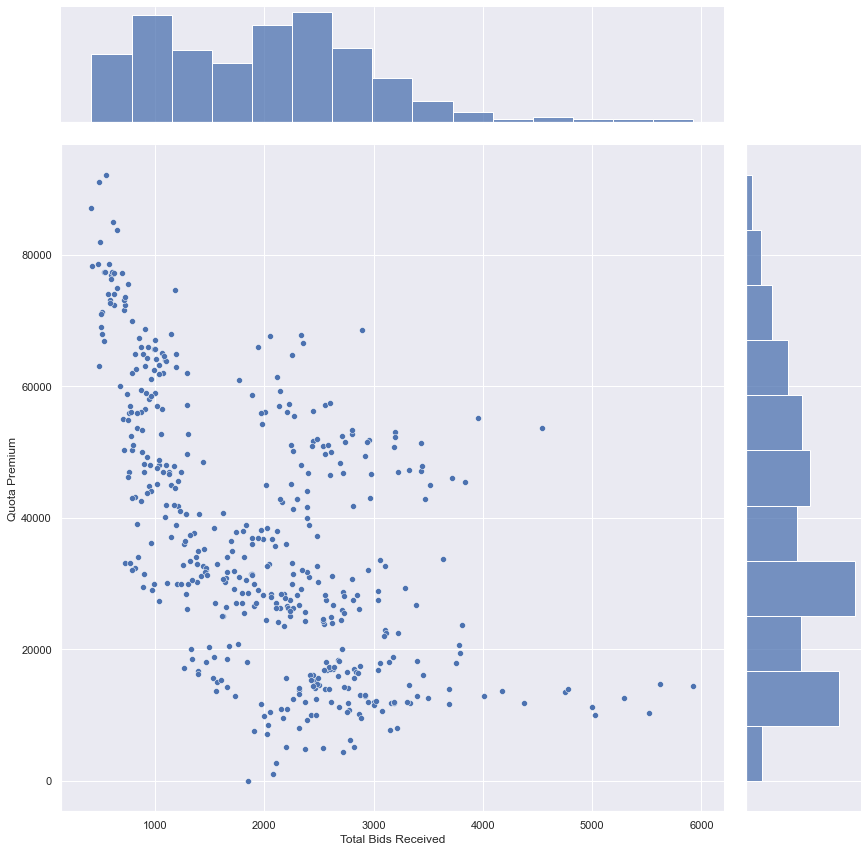

In [28]:
# Corelation with Quota Premium and Total Bids Received
f = plt.figure(figsize=(6, 4))

sb.jointplot(data=TimeAndGDPAndCatA, x = "Total Bids Received",y = "Quota Premium", height = 12)

## Jointplot of Quota Premium vs GDP

<Figure size 432x288 with 0 Axes>

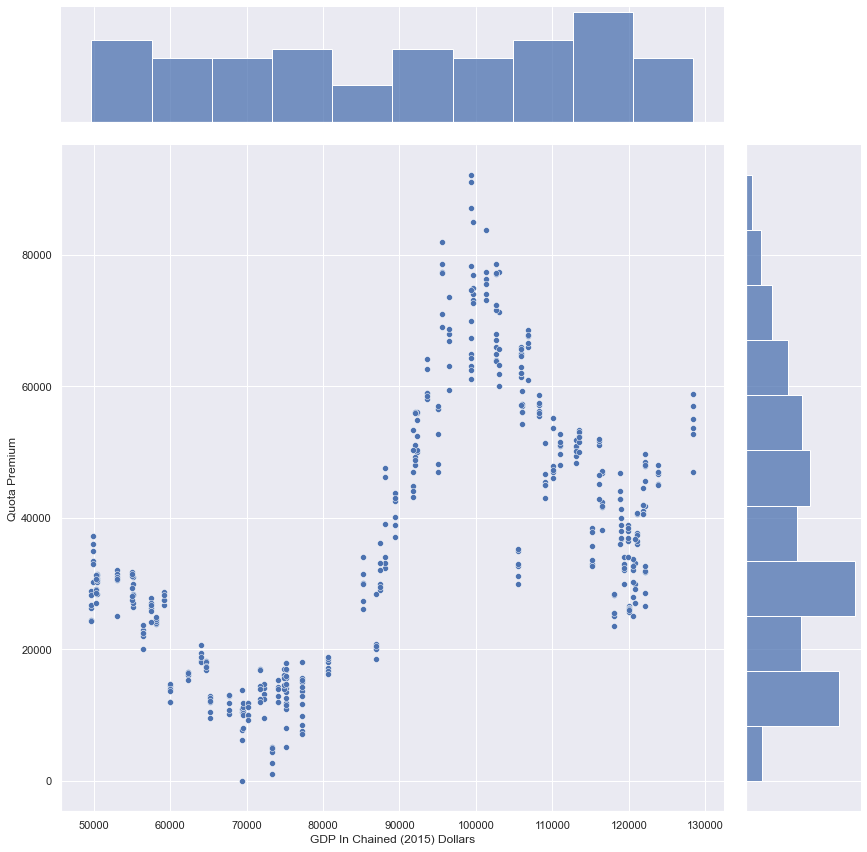

In [29]:
#Corelation between GDP vs Quota Premium

f = plt.figure(figsize=(6, 4))
sb.jointplot(data=TimeAndGDPAndCatA, x = "GDP In Chained (2015) Dollars",y = "Quota Premium", height = 12)

## Jointplot of Quota Premium vs number of Quota

<Figure size 432x288 with 0 Axes>

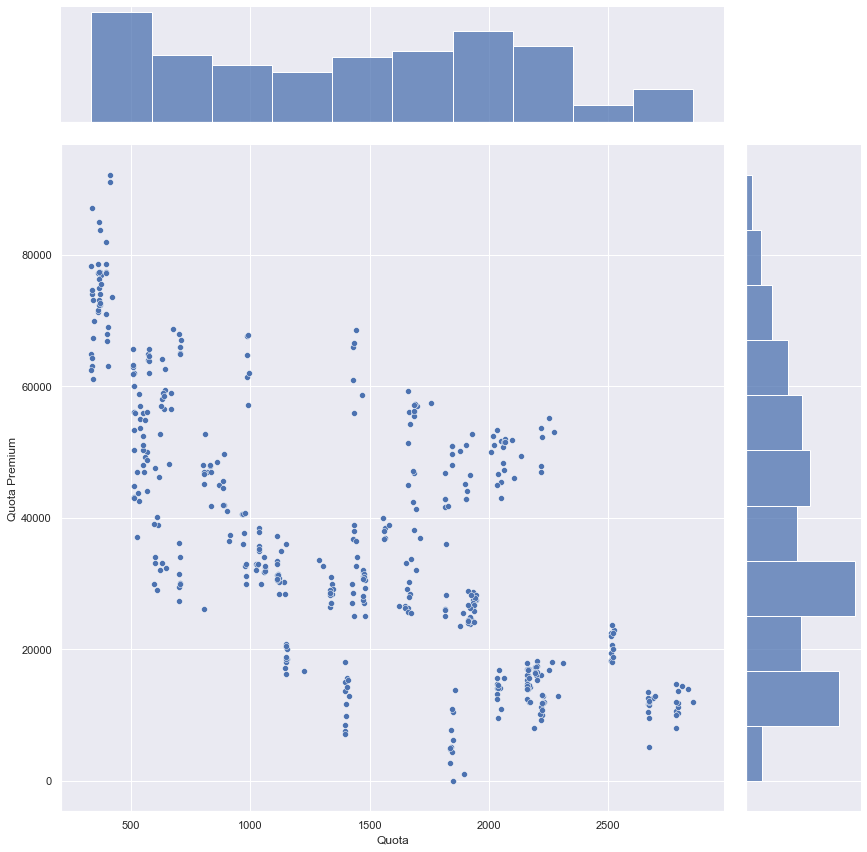

In [30]:
# Corelation with Quota Premium and number of Quota
f = plt.figure(figsize=(6, 4))

sb.jointplot(data=TimeAndGDPAndCatA, x = "Quota",y = "Quota Premium", height = 12)

In [31]:
jointDF.corr()

,Quota Premium,Total Bids Received,GDP In Chained (2015) Dollars,Quota
Quota Premium,1.000000,-0.583961,0.546626,-0.702569
Total Bids Received,-0.583961,1.000000,-0.311574,0.910202
GDP In Chained (2015) Dollars,0.546626,-0.311574,1.000000,-0.382305
Quota,-0.702569,0.910202,-0.382305,1.000000


From the above 3 joint plots, we can see that Quota Premium generally decreases as Total Bids Received increases and Quota premium also generally decreases as Quota increases.

From the above table, we can see that Quota Premium has a negative correlation with Total Bids Received, Quota and GDP In Chained (2015) Dollars. Furthermore, Quota Premium has the strongest correlation with Quota, with a negative correlation of -0.7025.

<AxesSubplot:>

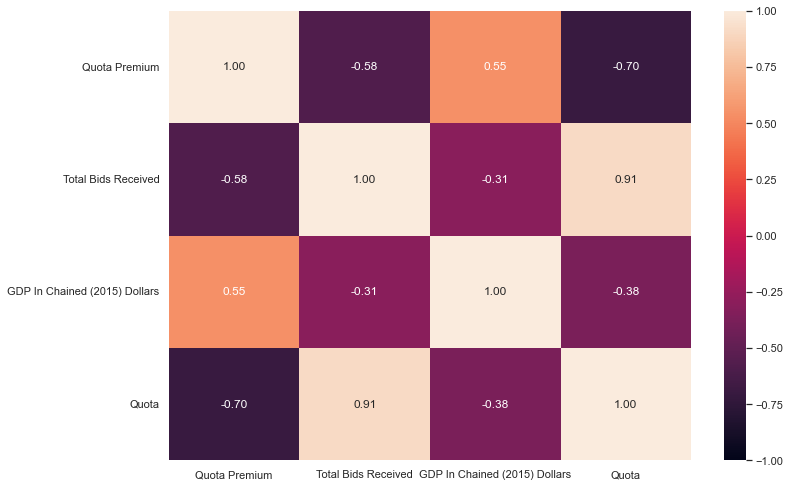

In [32]:
# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

# Applying linear regression on Quota Premium and Quota

Since Quota Premium has the strongest correlation with Quota, we decided to apply linear regression on these 2 variables. Quota Premium and Quota will be the response and predictor variables respectively.

In [33]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [34]:
#Mean Squared Error (MSE)
def mean_sq_err(actual,predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) -np.array(predicted)))

### Spliting data to 75% Train : 25% Test and calculating the linear regression line with Train data

In [35]:
# # Train the Linear Regression model
# Price = pd.DataFrame(TimeAndGDPAndCatA['Quota Premium']) # Response
# Quota = pd.DataFrame(TimeAndGDPAndCatA['Quota']) # Predictor
             
# linreg.fit(Quota, Price)

# Get the Price and the Number of quota into X and Y axis
Price = pd.DataFrame(TimeAndGDPAndCatA['Quota Premium']) # Response
Quota = pd.DataFrame(TimeAndGDPAndCatA['Quota']) # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Quota, Price, test_size = 0.25)
# test_size is the fraction of elements that you want in your test set

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Intercept of Regression 	: b =  [66065.49867248]
Coefficients of Regression 	: a =  [[-19.98065369]]



#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Explained Variance and Mean Squared Error.

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5019744107654409
Mean Squared Error (MSE) 	: 201119559.87428337
Root Mean Squared Error (RMSE) 	: 14181.662803574318

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.45353282148345897
Mean Squared Error (MSE) 	: 207405977.77868277
Root Mean Squared Error (RMSE) 	: 14401.596362163564



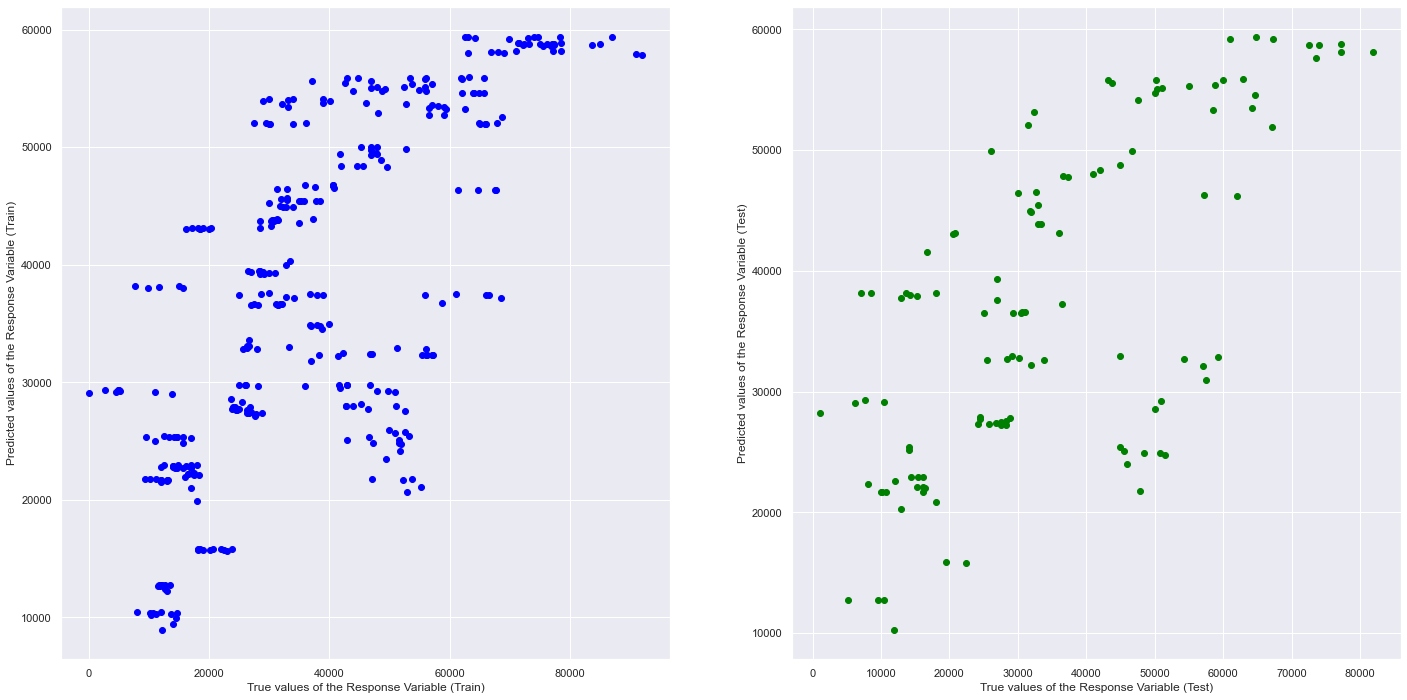

In [36]:
# Predict Price values corresponding to Quota
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()


# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
#axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
#axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Now we have the calculated regression line Y=MX+C
### We can plot the linear regression line along trained data

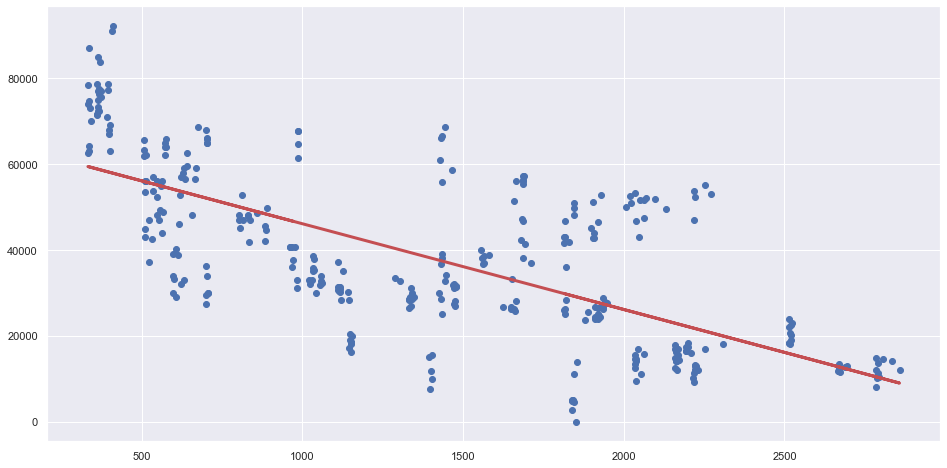

In [37]:
# Formula for the Regression line
regline_x = X_train ## train set for Quota
regline_y = linreg.intercept_ + linreg.coef_ * X_train

#print(regline_x,regline_y)

a = np.array(regline_x)
b = np.array(regline_y) #Error prevention from numplot

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(a, b, 'r-', linewidth = 3)
plt.show()

## With this line, we can use it as a prediction base on the number of quota

In [38]:
Num = input("Enter amount of quota: ")

pred_ = linreg.intercept_[0] + linreg.coef_[0] * int(Num)
print("The predicted value is : ")
pred_[0]

Enter amount of quota: 1
The predicted value is : 


66045.51801878616

## Let's throw in some data into the trained model!

In [39]:
# Extract some Test for Prediction

COE_pred = TimeAndGDPAndCatA.loc[TimeAndGDPAndCatA["Announcement Date"].isin(["6/6/2018","4/9/2013","1/1/2007"])]
COE_pred

,Data Series,GDP In Chained (2015) Dollars,Bidding Exercise,Announcement Date,Year,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids,Epoch Date,Date
79,1530374400.0,119866.0,June 2018 First Open Bidding Exercise,6/6/2018,2018.0,Cat A (Cars up to 1600cc and 97kW),1441.0,36426.0,1696.0,1440.0,1528243200.0,2018-06-06
193,1380556800.0,101366.2,September 2013 First Open Bidding Exercise,4/9/2013,2013.0,Cat A (Cars up to 1600cc and 97kW),366.0,77304.0,609.0,365.0,1378252800.0,2013-09-04
330,1199116800.0,75196.5,January 2007 First Open Bidding Exercise,1/1/2007,2007.0,Cat A (Cars up to 1600cc and 97kW),2668.0,11704.0,3686.0,2663.0,1167609600.0,2007-01-01


In [40]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(COE_pred['Quota'])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred

array([[37273.3766992 ],
       [58752.57942042],
       [12757.11461647]])

In [41]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["PredPrice"], index = COE_pred.index)
COE_acc = pd.concat([COE_pred[["Announcement Date", "Quota Premium"]], y_pred], axis = 1)

y_errs = 100 * abs(COE_acc["Quota Premium"] - COE_acc["PredPrice"]) / COE_acc["Quota Premium"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = COE_pred.index)
COE_acc = pd.concat([COE_acc, y_errs], axis = 1)

COE_acc

,Announcement Date,Quota Premium,PredPrice,Error
79,6/6/2018,36426.0,37273.376699,2.326296
193,4/9/2013,77304.0,58752.579420,23.998009
330,1/1/2007,11704.0,12757.114616,8.997903


From the above, we are able to see the actual quota premium, the predicted quota premium and the error between the percentage error between the prediction and the actual value

#### Prediction Interval

The confidence on Prediction depends on the Distribution and Deviation of the Errors in Prediction.    
We obtain the Mean Squared Error on the Train Set while fitting/training the Linear Regression Model.    

The Standard Error of Prediction may be estimated as $StdE = \sqrt{\frac{n}{n-2} MSE}$ from the Train Set.

In [42]:
MSE_train = mean_squared_error(y_train, y_train_pred)
StdE_pred = np.sqrt(len(y_train) * MSE_train/(len(y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))

Mean Squared Error (MSE) 	: 201119559.87
Pred Standard Error (SE) 	: 14222.24


In Prediction, we assume a Gaussian (Normal) Distribution for Predictions Errors.    
The `95%` Prediction Interval for any data point is given by $Prediction \pm 1.96 \times StdE$    
The `99%` Prediction Interval for any data point is given by $Prediction \pm 2.58 \times StdE$

In [43]:
y_95l = pd.DataFrame(COE_acc["PredPrice"] - 1.96*StdE_pred).rename(columns = {"PredPrice" : "95 Lower"})
y_95u = pd.DataFrame(COE_acc["PredPrice"] + 1.96*StdE_pred).rename(columns = {"PredPrice" : "95 Upper"})
y_99l = pd.DataFrame(COE_acc["PredPrice"] - 2.58*StdE_pred).rename(columns = {"PredPrice" : "99 Lower"})
y_99u = pd.DataFrame(COE_acc["PredPrice"] + 2.58*StdE_pred).rename(columns = {"PredPrice" : "99 Upper"})

COE_int = pd.concat([COE_acc, y_95l, y_95u, y_99l, y_99u], axis = 1)
COE_int

,Announcement Date,Quota Premium,PredPrice,Error,95 Lower,95 Upper,99 Lower,99 Upper
79,6/6/2018,36426.0,37273.376699,2.326296,9397.786514,65148.966884,579.997782,73966.755616
193,4/9/2013,77304.0,58752.579420,23.998009,30876.989236,86628.169605,22059.200504,95445.958337
330,1/1/2007,11704.0,12757.114616,8.997903,-15118.475568,40632.704801,-23936.264300,49450.493533


# Can we make money from this model then?

#### We will simulate a trading period of 5 years from the beginning of 2010 to the end 2014 (5 full years)

In [44]:
INPUT = TimeAndGDPAndCatA.loc[TimeAndGDPAndCatA["Year"].isin([2010.0,2011.0,2012.0,2013.0,2014.0])]
INPUT.index = INPUT.index -162 ## puh the index of the INPUT back to 0 else it will copy the index from the source of the data (TimeAndGDPAndCatA)
INPUT ## input data to the estimation

,Data Series,GDP In Chained (2015) Dollars,Bidding Exercise,Announcement Date,Year,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids,Epoch Date,Date
0,1420041600.0,102572.2,December 2014 Second Open Bidding Exercise,17/12/2014,2014.0,Cat A (Cars up to 1600cc and 97kW),705.0,65889.0,868.0,699.0,1418774400.0,2014-12-17
1,1420041600.0,102572.2,December 2014 First Open Bidding Exercise,3/12/2014,2014.0,Cat A (Cars up to 1600cc and 97kW),709.0,67089.0,996.0,703.0,1417564800.0,2014-12-03
2,1420041600.0,102572.2,November 2014 Second Open Bidding Exercise,19/11/2014,2014.0,Cat A (Cars up to 1600cc and 97kW),701.0,67889.0,1144.0,694.0,1416355200.0,2014-11-19
3,1420041600.0,102572.2,November 2014 First Open Bidding Exercise,5/11/2014,2014.0,Cat A (Cars up to 1600cc and 97kW),703.0,64900.0,1196.0,692.0,1415145600.0,2014-11-05
4,1420041600.0,102572.2,October 2014 Second Open Bidding Exercise,23/10/2014,2014.0,Cat A (Cars up to 1600cc and 97kW),572.0,63990.0,1092.0,569.0,1414022400.0,2014-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1270051200.0,86924.0,March 2010 First Open Bidding Exercise,10/3/2010,2010.0,Cat A (Cars up to 1600cc and 97kW),1148.0,20802.0,1758.0,1141.0,1268179200.0,2010-03-10
116,1270051200.0,86924.0,February 2010 Second Open Bidding Exercise,24/2/2010,2010.0,Cat A (Cars up to 1600cc and 97kW),1148.0,20340.0,1493.0,1148.0,1266969600.0,2010-02-24
117,1270051200.0,86924.0,February 2010 First Open Bidding Exercise,3/2/2010,2010.0,Cat A (Cars up to 1600cc and 97kW),1154.0,19989.0,1326.0,1153.0,1265155200.0,2010-02-03
118,1270051200.0,86924.0,January 2010 Second Open Bidding Exercise,20/1/2010,2010.0,Cat A (Cars up to 1600cc and 97kW),1151.0,20501.0,1673.0,1149.0,1263945600.0,2010-01-20


In [45]:
## empty dictionary
predicted5years = {}

In [46]:
## for loop to add things
fiveyearlist=[]
for i in INPUT["Quota"]:
    j = linreg.intercept_[0] + linreg.coef_[0] * int(i) ## calculate the value of the 
    fiveyearlist.append(j[0]) ##insert the Predicted value into the list
predicted5years["Predicted Price"] = fiveyearlist ## attach the list to the dictionary key
#print(predicted5years)

In [47]:
five_year_COE_pred=pd.DataFrame(predicted5years) ## create a dataframe containing the predicted prices
five_year_COE_pred.head()

,Predicted Price
0,51979.137818
1,51899.215203
2,52059.060433
3,52019.099125
4,54636.564759


In [48]:
overall_df = pd.DataFrame(INPUT["Quota Premium"])

overall_df=pd.concat( [INPUT, five_year_COE_pred] , axis = 1).reindex(INPUT.index)
overall_df.head(2) ## glue the actual Quota premium, predicted quotea premium and date together

,Data Series,GDP In Chained (2015) Dollars,Bidding Exercise,Announcement Date,Year,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids,Epoch Date,Date,Predicted Price
0,1420041600.0,102572.2,December 2014 Second Open Bidding Exercise,17/12/2014,2014.0,Cat A (Cars up to 1600cc and 97kW),705.0,65889.0,868.0,699.0,1418774400.0,2014-12-17,51979.137818
1,1420041600.0,102572.2,December 2014 First Open Bidding Exercise,3/12/2014,2014.0,Cat A (Cars up to 1600cc and 97kW),709.0,67089.0,996.0,703.0,1417564800.0,2014-12-03,51899.215203


In [49]:
overall_df.iloc[-1]

Data Series                                                  1270051200.0
GDP In Chained (2015) Dollars                                     86924.0
Bidding Exercise                 January 2010 First Open Bidding Exercise
Announcement Date                                                6/1/2010
Year                                                               2010.0
Category                               Cat A (Cars up to 1600cc and 97kW)
Quota                                                              1152.0
Quota Premium                                                     18502.0
Total Bids Received                                                1342.0
Number of Successful Bids                                          1145.0
Epoch Date                                                   1262736000.0
Date                                                  2010-01-06 00:00:00
Predicted Price                                              43047.785617
Name: 119, dtype: object

In [50]:
Earning_dict = {
    "Date of purchase": [],
    "Purchase Price": [],
    "Sale Price":[],
    "Sale Date": [],
    "Stop lost target" : [],
    "Stop gain target" : [],
    "Profit/Loss": [],
} ##define the columns of the earning data frame 
Earning_df = pd.DataFrame(Earning_dict)
Earning_df.head()

,Date of purchase,Purchase Price,Sale Price,Sale Date,Stop lost target,Stop gain target,Profit/Loss


In [51]:
##retired function, easier to make a column in memory to refer to
def predictprice(QUOTA):
    j = linreg.intercept_[0] + linreg.coef_[0] * int(QUOTA)
    return j[0]

In [62]:
def DoIbuy(PreviousPredictedPrice, CurrentPredictedPrice):
    if (PreviousPredictedPrice<CurrentPredictedPrice) or (PreviousPredictedPrice == CurrentPredictedPrice) :
        return 1; ## if the current session pridicted price is expected to be a raise from the previous, buy now !
    elif (PreviousPredictedPrice>CurrentPredictedPrice):
        return -1; ## if the current sesion predicted price is expected to be LOWER than the previous, SELL!!!

In [63]:
def PurchaseOrder(inputdataframe,Input_data_rowNumber, tallysheet_df, protection):
    ## when triggered this function will retrieve the relavant information from inputdataframe
    ## pls rmb to correct the index
    ## pls rmb to sort the index too!
    ## the data will be appended to the earning Dataframe
    tallysheet_df.loc[-1] = [pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA, pd.NA]##create an empty row
    tallysheet_df.at[-1, "Date of purchase"] = inputdataframe.at[Input_data_rowNumber,"Date"]
    tallysheet_df.at[-1, "Purchase Price"] = inputdataframe.at[Input_data_rowNumber,"Quota Premium"]
    tallysheet_df.at[-1, "Stop lost target"] = tallysheet_df.at[-1, "Purchase Price"] *(1-protection)
    tallysheet_df.at[-1, "Stop gain target"] = tallysheet_df.at[-1, "Purchase Price"] *(1+protection)
    tallysheet_df.fillna(value = "NA", inplace = True)
    return

In [54]:
def SellOrder(tallysheet_df, currentSalePrice, currentDate, wallet, DoIbuyResult):
    ## when triggerd this function will scroll down the earning_df to find a row that hasn't been sold and proceed to sell the COE
    ## this functon will also calculate the amount of money that the wallet has
    if (DoIbuyResult == -1):
        for i in range(0,Earning_df.shape[0],1):
            #print(i)
            if (tallysheet_df.at[i,"Sale Date"] == "NA"):
                print("we have encountered a COE that hasn't been sold!")
                if (currentSalePrice<tallysheet_df.at[i,"Stop lost target"]):##check if the COE is worth the current sale price
                    print("The COE we encountered is sold")
                    print("The purchase date was", tallysheet_df.at[i,"Date of purchase"])
                    tallysheet_df.at[i,"Sale Price"] = currentSalePrice
                    tallysheet_df.at[i,"Sale Date"] = currentDate
                    tallysheet_df.at[i,"Profit/Loss"] = tallysheet_df.at[i,"Sale Price"] - tallysheet_df.at[i,"Purchase Price"]
                    wallet = wallet + currentSalePrice
                elif (currentSalePrice>tallysheet_df.at[i,"Stop lost target"]):
                    print("The COE we encountered is NOT sold")
    elif (DoIbuyResult == 1):
        for i in range(1,Earning_df.shape[0],1):
            if (tallysheet_df.at[i,"Sale Date"] == "NA"):
                print("we have encountered a COE that hasn't been sold!")
                if (currentSalePrice>tallysheet_df.at[i,"Stop gain target"]):##check if the COE is worth the current sale price
                    print("The COE we encountered is sold")
                    print("The purchase date was", tallysheet_df.at[i,"Date of purchase"])
                    tallysheet_df.at[i,"Sale Price"] = currentSalePrice
                    tallysheet_df.at[i,"Sale Date"] = currentDate
                    tallysheet_df.at[i,"Profit/Loss"] = tallysheet_df.at[i,"Sale Price"] - tallysheet_df.at[i,"Purchase Price"]
                    wallet = wallet + currentSalePrice
                elif (currentSalePrice<tallysheet_df.at[i,"Stop gain target"]):
                    print("The COE we encountered is NOT sold")
    return wallet

In [68]:
## Let's assume the following as a strategy

## if COE about to expire (we can only hold for 6 months)
##    sell
## while algo says that the price will go up
##     we buy and hold
## when algo says that the price will drop 
##     if drop by more than 5 %, we sell
##     if drop by less than 5%, we hold

Assume that there is no COE expiry to reduce the complexity of the algorithm

Let the start date be 2014-01-22 (ie. 1 session has passed) and that we purchased at the previous session and assume that we have purchased the one in the previous session

In [56]:
##DRIVER CODE!!!
##
Earning_dict = {
    "Date of purchase": [],
    "Purchase Price": [],
    "Sale Price":[],
    "Sale Date": [],
    "Stop lost target" : [],
    "Stop gain target" : [],
    "Profit/Loss": [],
} ##define the columns of the earning data frame

Earning_df = pd.DataFrame(Earning_dict)
Earning_df.head()

## PROTECTION
risk = 0.05
tablesize = overall_df.shape[0]

In [57]:
##SET-UP
PurchaseOrder(overall_df,119,Earning_df,risk)
Earning_df.index =Earning_df.index +1  ##correct the index
Earning_df.sort_index()
wallet = 100000

In [58]:
sum = 0
propertyvalue = 0
for i in range(0,Earning_df.shape[0],1):
    if (Earning_df.at[i,"Profit/Loss"] == "NA"):
        propertyvalue += Earning_df.at[i,"Purchase Price"]
    else:
        j = int(Earning_df.at[i,"Profit/Loss"])
        sum+=j
print("Sum:",sum)
print("property value:", propertyvalue)
print("total value:",propertyvalue+sum+wallet)

Sum: 0
property value: 18502.0
total value: 118502.0


In [64]:
for iteration in range(tablesize-2, -1, -1): ## The first session is ignored due to assumption
    print(iteration)
    currentdate = overall_df.at[iteration, "Date"]
    print("The current date and time is",currentdate)
    currentPrice = overall_df.at[iteration, "Quota Premium"]
    print("The current Price is ",currentPrice, sep = "")

    #currentQuota = overall_df.at[iteration, "Quota"] ##get the current quota for prediction
    # prevQuota = overall_df.at[iteration-1, "Quota"] ## get the prvious Quota for prediction
    # Predicted_cur_Price = predictprice(currentQuota) ## get the current priedicted price
    
    Predicted_cur_Price = overall_df.at[iteration, "Predicted Price"] ##get the current priedicted price
    print("The Predicted current price is ", Predicted_cur_Price, sep = "")
    
    #Predicted_prev_Price = predictprice(prevQuota) 
    
    try:
        Predicted_prev_Price = overall_df.at[iteration+1, "Predicted Price"]
    except KeyError:
        print("we have reached the end of the table\n" , "job is done\n", "goodbye!", sep ="")
        break
    except:
        print("Something else went wrong!")
    
    print("The Predicted prev price was ",Predicted_prev_Price,sep = "")
    buy = 0 # This is a boolean variable encoded as an integer
    buy = DoIbuy(Predicted_prev_Price,Predicted_cur_Price)
    if (buy == 1):
        print("We buy at the current session!")
        if (wallet > currentPrice):
            print("we can purchase in the current session")
            print("Purchasing!")
            PurchaseOrder(overall_df, iteration,Earning_df, risk)
            ## Now need to correct the index of Earning_df
            Earning_df.index =Earning_df.index +1  ##correct the index
            Earning_df.sort_index()
            wallet = wallet - currentPrice
            wallet = SellOrder(Earning_df, currentPrice, currentdate, wallet,buy) ## check to see if there is any 
            print("our wallet has", wallet)
        else:
            print("we cannot afford the current session")
            wallet = SellOrder(Earning_df, currentPrice, currentdate, wallet,buy)
            print("our wallet has", wallet)
       
    elif (buy == -1):
        print("We don't buy at the current session!\nBut we are selling!")
        wallet = SellOrder(Earning_df, currentPrice, currentdate, wallet,buy)
        print("our wallet has", wallet)
    elif (buy == 0):
        print("buy = 0!\n","Something went wrong!", sep="")

118
The current date and time is 2010-01-20 00:00:00
The current Price is 20501.0
The Predicted current price is 43067.766270506654
The Predicted prev price was 43047.7856168125
We buy at the current session!
we can purchase in the current session
Purchasing!
we have encountered a COE that hasn't been sold!
The COE we encountered is NOT sold
we have encountered a COE that hasn't been sold!
The COE we encountered is NOT sold
our wallet has 86886.0
117
The current date and time is 2010-02-03 00:00:00
The current Price is 19989.0
The Predicted current price is 43007.824309424184
The Predicted prev price was 43067.766270506654
We don't buy at the current session!
But we are selling!
we have encountered a COE that hasn't been sold!
The COE we encountered is NOT sold
we have encountered a COE that hasn't been sold!
The COE we encountered is sold
The purchase date was 2014-12-17 00:00:00
we have encountered a COE that hasn't been sold!
The COE we encountered is sold
The purchase date was 2014

we have encountered a COE that hasn't been sold!
The COE we encountered is NOT sold
we have encountered a COE that hasn't been sold!
The COE we encountered is NOT sold
our wallet has 74811.0
77
The current date and time is 2011-10-05 00:00:00
The current Price is 50289.0
The Predicted current price is 55096.11979438862
The Predicted prev price was 55116.100448082776
We don't buy at the current session!
But we are selling!
we have encountered a COE that hasn't been sold!
The COE we encountered is NOT sold
we have encountered a COE that hasn't been sold!
The COE we encountered is NOT sold
we have encountered a COE that hasn't been sold!
The COE we encountered is NOT sold
our wallet has 74811.0
76
The current date and time is 2011-10-19 00:00:00
The current Price is 56112.0
The Predicted current price is 54776.429335282126
The Predicted prev price was 55096.11979438862
We don't buy at the current session!
But we are selling!
we have encountered a COE that hasn't been sold!
The COE we enco

we have encountered a COE that hasn't been sold!
The COE we encountered is sold
The purchase date was 2013-05-22 00:00:00
we have encountered a COE that hasn't been sold!
The COE we encountered is sold
The purchase date was 2013-04-24 00:00:00
our wallet has 196831.0
34
The current date and time is 2013-07-17 00:00:00
The current Price is 73989.0
The Predicted current price is 59391.96033863218
The Predicted prev price was 59312.03772385556
We buy at the current session!
we can purchase in the current session
Purchasing!
we have encountered a COE that hasn't been sold!
The COE we encountered is NOT sold
our wallet has 122842.0
33
The current date and time is 2013-08-07 00:00:00
The current Price is 75556.0
The Predicted current price is 58612.71484456009
The Predicted prev price was 59391.96033863218
We don't buy at the current session!
But we are selling!
we have encountered a COE that hasn't been sold!
The COE we encountered is NOT sold
we have encountered a COE that hasn't been sold

In [60]:
sum = 0
propertyvalue = 0
for i in range(0,Earning_df.shape[0],1):
    if (Earning_df.at[i,"Profit/Loss"] == "NA"):
        propertyvalue += Earning_df.at[i,"Purchase Price"]
    else:
        j = int(Earning_df.at[i,"Profit/Loss"])
        sum+=j
print("Sum:",sum)
print("property value:", propertyvalue)
print("total value:",propertyvalue+sum+wallet)

Sum: 119615
property value: 130730.0
total value: 357732.0


In [61]:
Earning_df

,Date of purchase,Purchase Price,Sale Price,Sale Date,Stop lost target,Stop gain target,Profit/Loss
56,2010-01-06,18502.0,20501.0,2010-01-20 00:00:00,17576.90,19427.10,1999.0
55,2010-01-20,20501.0,28389.0,2010-03-24 00:00:00,19475.95,21526.05,7888.0
54,2010-02-24,20340.0,28389.0,2010-03-24 00:00:00,19323.00,21357.00,8049.0
53,2010-03-10,20802.0,28389.0,2010-03-24 00:00:00,19761.90,21842.10,7587.0
52,2010-03-24,28389.0,34001.0,2010-04-07 00:00:00,26969.55,29808.45,5612.0
51,2010-04-07,34001.0,30000.0,2010-04-21 00:00:00,32300.95,35701.05,-4001.0
50,2010-05-19,27389.0,31510.0,2010-06-23 00:00:00,26019.55,28758.45,4121.0
49,2010-06-23,31510.0,29501.0,2010-07-07 00:00:00,29934.50,33085.50,-2009.0
48,2010-07-21,36162.0,33089.0,2010-09-08 00:00:00,34353.90,37970.10,-3073.0
47,2010-08-04,32104.0,34001.0,2010-11-03 00:00:00,30498.80,33709.20,1897.0



After our simulation, we found that the trading algorithm was succesful in making a profit. Initially, our wallet had a starting value of $100000.0. 

At end of the simulation, our wallet had a value of $126102.0. 

We made a profit of $26102.